In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_path = r'C:\Users\nares\Downloads\PRINTEDboard.csv'
printedBoard= pd.read_csv(file_path)


In [5]:
X = printedBoard_data.drop(columns=['Grey'])
y = printedBoard['Grey']

In [6]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 0.9703 - loss: 0.0661 - val_accuracy: 0.9943 - val_loss: 0.0142
Epoch 2/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.9950 - loss: 0.0129 - val_accuracy: 0.9964 - val_loss: 0.0093
Epoch 3/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.9967 - loss: 0.0089 - val_accuracy: 0.9968 - val_loss: 0.0078
Epoch 4/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9971 - loss: 0.0077 - val_accuracy: 0.9972 - val_loss: 0.0072
Epoch 5/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9973 - loss: 0.0068 - val_accuracy: 0.9975 - val_loss: 0.0064
Epoch 6/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9975 - loss: 0.0064 - val_accuracy: 0.9978 - val_loss: 0.0059
Epoch 7/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9975 - loss: 0.0061 - val_accuracy: 0.9977 - val_loss: 0.0060
Epoch 8/50
28942/28942 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 

In [12]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

4523/4523 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142330
           1       0.98      0.98      0.98      2381

    accuracy                           1.00    144711
   macro avg       0.99      0.99      0.99    144711
weighted avg       1.00      1.00      1.00    144711



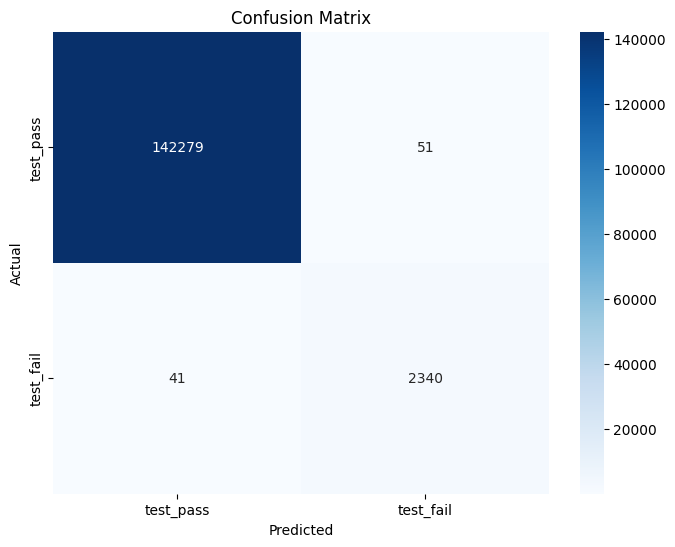

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['test_pass', 'test_fail'], yticklabels=['test_pass', 'test_fail'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting training and validation metrics
plt.figure(figsize=(14, 6))

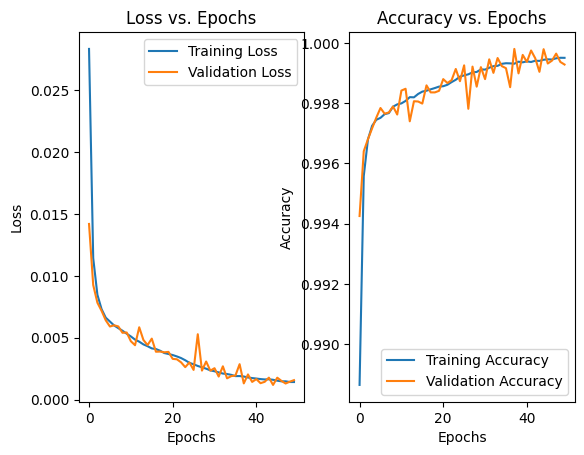

In [14]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.show()